In [1]:
import numpy as np
from sklearn.cluster import KMeans
import ot
import ot.plot
import matplotlib.pylab as pl

In [2]:
import sys
sys.path.append('../code/')
sys.path.append('../code/Latent_OT')
from generate_data import make_data
from Latent_OT import LOT_freesupp,LOT_fixsupp

In [3]:
def compute_kmeans_centroids(X, **kwargs):
    kmeans = KMeans(**kwargs).fit(X)
    return kmeans.cluster_centers_

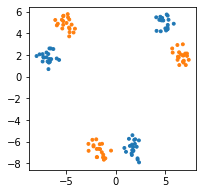

In [4]:
n,m,d=60,60,2
X,_=make_data("mog_reg",n,d)
_,Y=make_data("mog_reg",m,d)
X,Y=X.numpy(),Y.numpy()
a,b=np.ones((n,))/n,np.ones((m,))/m

pl.figure(figsize=(3,3))
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*500)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*500)

In [24]:
n_source_anchors = 9
n_target_anchors = 3

Zx = compute_kmeans_centroids(X, n_clusters=n_source_anchors)
Zy = compute_kmeans_centroids(Y, n_clusters=n_target_anchors)


mu= np.ones((n,))/n
nu = np.ones((m,))/n
#mu=np.random.randint(1, 5, (n,)).astype(float)
#mu/=np.sum(mu)

#print(mu,nu)

eps = 3
Cx,Cy,Cz=ot.dist(X,Zx),ot.dist(Zy,Y),ot.dist(Zx,Zy)
Gx = np.exp(Cx / eps)
Gz = np.exp(Cz / eps)
Gy = np.exp(Cy / eps)

Px, Py, Pz, P=LOT_fixsupp(Gx, Gz, Gy,mu,nu, niter=500)

262073239770322.1
262073239770322.97
3671.574946308602
6.7025325528833175
0.6567865342138175
0.1297610652563581
0.05873738031034245
0.05228311275629993
0.04681857009886997
0.0420090656567115
0.03772858142515395
0.03390436882381148
0.03048161618889228
0.02741460886053601
0.024663933512397235
0.022195185268052947
0.019978139226776465
0.017986127520379813
0.016195541557378346
0.014585423983954487
0.01313712913083051
0.011834037171143563
0.010661311115035904
0.009605688453577288
0.008655301199695015
0.0077995194873816676
0.007028814933015742
0.006334640738187403
0.005709326097002587
0.0051459829156059456
0.0046384231956445865
0.004181085702784859
0.0037689707558679897
0.0033975821453454402
0.0030628753304962897
0.002761211181785961
0.002489314631836964
0.00224423768036891
0.0020233262680605657
0.0018241905935031388
0.001644678498537444
0.0014828515912304607
0.0013369638141356444
0.0012054421986178454
0.0010868695752228041
0.0009799690356815938
0.0008835899644122347
0.0007966954772710699
0.

Text(0.5, 1.0, 'Source to target (through anchors)')

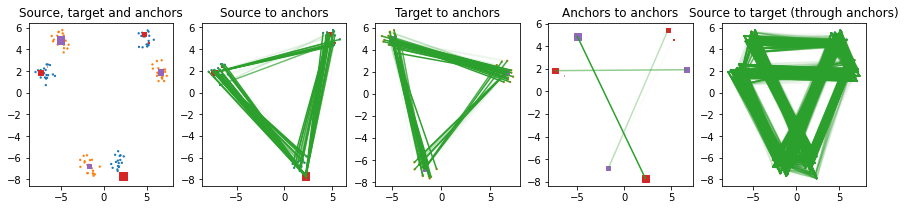

In [22]:
s=1e2
pl.figure(figsize=(15,3))
pl.subplot(1,5,1)
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=np.sum(Px,1)*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=np.sum(Py,0)*s)
pl.scatter(Zx[:, 0], Zx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Zy[:, 0], Zy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")
pl.title("Source, target and anchors")

pl.subplot(1,5,2)
ot.plot.plot2D_samples_mat(X,Zx, Px, c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=np.sum(Px,1)*s)
pl.scatter(Zx[:, 0], Zx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.title("Source to anchors")

pl.subplot(1,5,3)
ot.plot.plot2D_samples_mat(Zy,Y, Py, c='C2')
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=np.sum(Py,0)*s)
pl.scatter(Zy[:, 0], Zy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")
pl.title("Target to anchors")

pl.subplot(1,5,4)
ot.plot.plot2D_samples_mat(Zx,Zy, Pz, c='C2')
pl.scatter(Zx[:, 0], Zx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Zy[:, 0], Zy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")
pl.title("Anchors to anchors")

pl.subplot(1,5,5)
ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=np.sum(Px,1)*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=np.sum(Py,0)*s)
pl.title("Source to target (through anchors)")

In [18]:
np.sum(Px),np.sum(Py),np.sum(Pz),np.sum(P)

(0.9999999998969733,
 0.9999999999038289,
 0.9999999999038294,
 0.9999999999038295)

In [16]:
np.sum(Pz,1),np.sum(Pz,0)

(array([8.73127040e-06, 2.74746508e-01, 4.80321123e-05, 1.71970081e-01,
        4.12038782e-03, 1.68529709e-07, 9.22441473e-03, 5.39758939e-01,
        1.22737093e-04]),
 array([0.27898963, 0.53980714, 0.18120323]))

In [20]:
X.shape,Y.shape,Zx.shape,Zy.shape

((60, 2), (30, 2), (9, 2), (2, 2))

In [24]:
Px.shape,Py.shape,Pz.shape,P.shape

((60, 9), (2, 30), (9, 2), (60, 30))

In [6]:
Cx,Cy,Px,Py,Pz,P = fit(X,Y,n_source_anchors= n_source_anchors, n_target_anchors= n_target_anchors, epsilon=eps, epsilon_z=eps)
Zx,Zy=compute_kmeans_centroids(X, n_clusters=n_source_anchors),compute_kmeans_centroids(Y, n_clusters=n_target_anchors)

NameError: name 'fit' is not defined

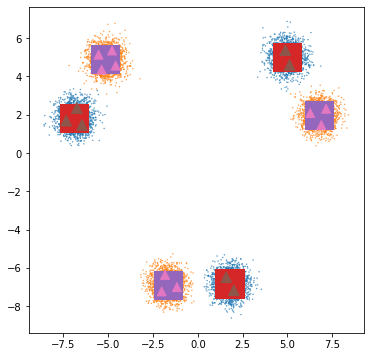

In [113]:
s=8e2
pl.figure(figsize=(6,6))
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")
pl.scatter(Zx[:, 0], Zx[:, 1], c='C5', label='Source',s=(np.ones((n_source_anchors,))/n_source_anchors)*s,marker="^")
pl.scatter(Zy[:, 0], Zy[:, 1], c='C6', label='Target',s=(np.ones((n_target_anchors,))/n_target_anchors)*s,marker="^")

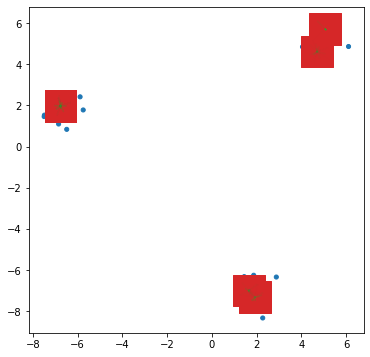

In [103]:
s=1e3
pl.figure(figsize=(6,6))
ot.plot.plot2D_samples_mat(X,Cx, Px, c='C2')
#ot.plot.plot2D_samples_mat(Cy,Y, Py, c='C2')
#ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
#ot.plot.plot2D_samples_mat(Cx,Cy, Pz, c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
#pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")

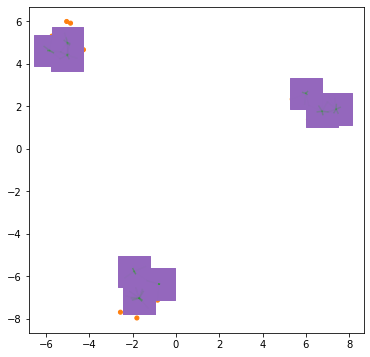

In [104]:
s=1e3
pl.figure(figsize=(6,6))
#ot.plot.plot2D_samples_mat(X,Cx, Px, c='C2')
ot.plot.plot2D_samples_mat(Cy,Y, Py, c='C2')
#ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
#ot.plot.plot2D_samples_mat(Cx,Cy, Pz, c='C2')
#pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
#pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")

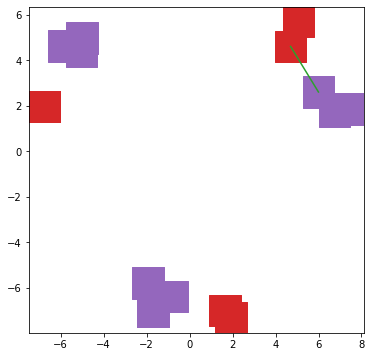

In [105]:
s=1e3
pl.figure(figsize=(6,6))
#ot.plot.plot2D_samples_mat(X,Cx, Px, c='C2')
#ot.plot.plot2D_samples_mat(Cy,Y, Py, c='C2')
#ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
ot.plot.plot2D_samples_mat(Cx,Cy, Pz, c='C2')
#pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")

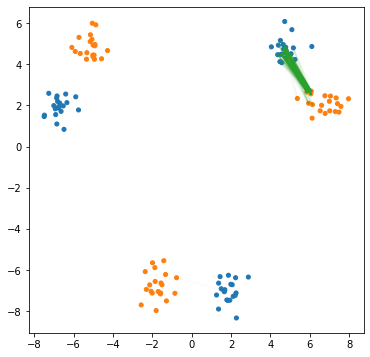

In [106]:
s=1e3
pl.figure(figsize=(6,6))
#ot.plot.plot2D_samples_mat(X,Cx, Px, c='C2')
#ot.plot.plot2D_samples_mat(Cy,Y, Py, c='C2')
ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
ot.plot.plot2D_samples_mat(Cx,Cy, Pz, c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
#pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
#pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")